In [42]:
import sys
import pandas as pd
from datetime import date
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [43]:
counts = pd.read_json("reddit-counts.json.gz", lines=True)

In [44]:
counts_canada = counts.loc[counts['subreddit'] == "canada"]
filtered = counts_canada.loc[(counts_canada['date'].dt.year==2013) | (counts_canada['date'].dt.year==2012)]


In [45]:
weekend = filtered.loc[(filtered['date'].dt.dayofweek==5)|(filtered['date'].dt.dayofweek==6)]
weekday = filtered.loc[(filtered['date'].dt.dayofweek!=5)& (filtered['date'].dt.dayofweek!=6)]
print()

In [46]:
ttest = stats.ttest_ind(weekend["comment_count"],weekday["comment_count"],equal_var = False)
print(ttest.statistic)
print(ttest.pvalue)

-19.068164546804166
6.138975517118774e-60


In [47]:
weekend_n = stats.normaltest(weekend["comment_count"])
print("normality ",weekend_n.pvalue)
weekday_n = stats.normaltest(weekday["comment_count"])
print("normality ",weekday_n.pvalue)
stat,p= stats.levene(weekend["comment_count"],weekday["comment_count"])
print("equal variance p-value: ",p)

print("Not normally distrubuted, not equal variance")
print("It is very unlikely that there are same number of comments on weekdays and weekends")

normality  0.0015209196859635404
normality  1.0091137251707994e-07
equal variance p-value:  0.04378740989202803
Not normally distrubuted, not equal variance
It is very unlikely that there are same number of comments on weekdays and weekends


c:\users\leonwu\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


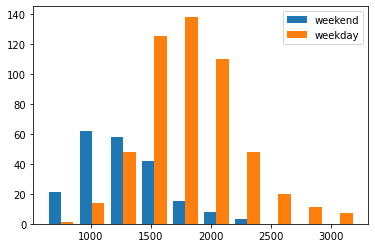

In [48]:
plt.figure()
plt.hist((weekend["comment_count"],weekday["comment_count"]),label = ['weekend','weekday'])
plt.legend(loc='upper right')
plt.show()

In [49]:
weekend_trans = np.sqrt(weekend["comment_count"])
weekday_trans = np.sqrt(weekday["comment_count"])
weekend_n = stats.normaltest(weekend_trans)
print("normality ",weekend_n.pvalue)
weekday_n = stats.normaltest(weekday_trans)
print("normality ",weekday_n.pvalue)
stat,p= stats.levene(weekend_trans,weekday_trans)
print("equal variance p-value: ",p)
print("First one normally distrubuted,equal variance")

normality  0.10760562894666933
normality  0.03687221613365365
equal variance p-value:  0.5560544297516696
First one normally distrubuted,equal variance


In [50]:
## adopted from https://stackoverflow.com/questions/48058304/how-to-apply-series-in-isocalendar-function-in-pandas-python
## Fix 2 
weekend_CLT = filtered.loc[(filtered['date'].dt.dayofweek==5)|(filtered['date'].dt.dayofweek==6)]
weekday_CLT = filtered.loc[(filtered['date'].dt.dayofweek!=5)& (filtered['date'].dt.dayofweek!=6)]

weekend_CLT["year"] = weekend_CLT["date"].apply(lambda x: str(x.isocalendar()[0]) )
weekend_CLT["month"] = weekend_CLT["date"].apply(lambda x: str(x.isocalendar()[1]) )

weekday_CLT["year"] = weekday_CLT["date"].apply(lambda x: str(x.isocalendar()[0]) )
weekday_CLT["month"] = weekday_CLT["date"].apply(lambda x: str(x.isocalendar()[1]) )

aggregated_weekend = weekend_CLT.groupby(['year', 'month']).mean()
aggregated_weekday = weekday_CLT.groupby(['year', 'month']).mean()
#aggregated = counts.groupby(['year', 'month']).mean()
print(aggregated_weekend)
print(aggregated_weekday)
#print(aggregated)

            comment_count
year month               
2011 52             995.0
2012 1             1163.0
     10            1353.0
     11            1282.0
     12            1759.0
...                   ...
2013 52            1117.5
     6             1718.5
     7              786.5
     8             1863.5
     9             1284.0

[105 rows x 1 columns]
            comment_count
year month               
2012 1             1561.6
     10            1956.0
     11            2001.0
     12            2225.4
     13            2061.8
...                   ...
2013 6             1593.2
     7             1653.0
     8             1729.0
     9             2024.6
2014 1             1437.0

[105 rows x 1 columns]


c:\users\leonwu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\leonwu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\leonwu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [51]:
ttest = stats.ttest_ind(aggregated_weekend["comment_count"],aggregated_weekday["comment_count"])
print(ttest.pvalue)

1.3353656052303141e-34


In [52]:
a_weekend_n = stats.normaltest(aggregated_weekend["comment_count"])
print("normality ",a_weekend_n.pvalue)
a_weekday_n = stats.normaltest(aggregated_weekday["comment_count"])
print("normality ",a_weekday_n.pvalue)
stat,p= stats.levene(aggregated_weekend["comment_count"],aggregated_weekday["comment_count"])
print("equal variance p-value: ",p)


normality  0.15294924717078573
normality  0.3082637390825463
equal variance p-value:  0.20383788083573426


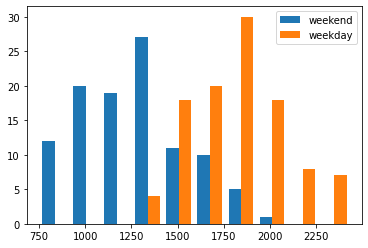

In [53]:
plt.figure()
plt.hist((aggregated_weekend["comment_count"],aggregated_weekday["comment_count"]),label = ['weekend','weekday'])
plt.legend(loc='upper right')
plt.show()

In [54]:
##fix 3
weekend_u = filtered.loc[(filtered['date'].dt.dayofweek==5)|(filtered['date'].dt.dayofweek==6)]
weekday_u = filtered.loc[(filtered['date'].dt.dayofweek!=5)& (filtered['date'].dt.dayofweek!=6)]
u_test = stats.mannwhitneyu(weekend_u["comment_count"],weekday_u["comment_count"],alternative = 'two-sided')
print(u_test)

MannwhitneyuResult(statistic=15099.0, pvalue=8.624453234733935e-53)
